In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import pickle
import skill_metrics as sm

In [2]:
greenbears = pd.read_csv('phenology-2021-03-08-greenbears_stl.csv')
PEG = pd.read_csv('preds.csv')
EDM = pd.read_csv('phenology-2021-03-08-UCSC_P_EDM.csv')
Obs = pd.read_csv('targets_gcc.csv')

In [3]:
def extrac_site_mean(data, target):
    if 'statistic' in data.columns:
        data = data[(data['siteID']==target) & (data['statistic']=='mean')]
    else:
        data = data[(data['siteID']==target)]
    data.reset_index()
    data['row_number'] = np.arange(len(data))+1
    return data

In [4]:
PEG_HARV = extrac_site_mean(PEG, 'HARV')
greenbears_HARV = extrac_site_mean(greenbears, 'HARV')
EDM_HARV = extrac_site_mean(EDM, 'HARV')
Obs_HARV = extrac_site_mean(Obs, 'HARV').dropna()

<ipython-input-3-92722e401293>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['row_number'] = np.arange(len(data))+1


In [5]:
n = len(greenbears_HARV)

In [6]:
PEG_taylor_stats = sm.taylor_statistics(PEG_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])
greenbears_taylor_stats = sm.taylor_statistics(greenbears_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])
EDM_taylor_stats = sm.taylor_statistics(EDM_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])
Obs_taylor_stats = sm.taylor_statistics(Obs_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])

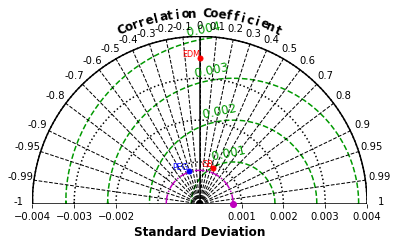

In [21]:
sdev = np.array([#Obs_taylor_stats['sdev'][1], 
                #Obs_taylor_stats['sdev'][1], 
                PEG_taylor_stats['sdev'][0],
                greenbears_taylor_stats['sdev'][1], 
                EDM_taylor_stats['sdev'][1]])
                #PEG_taylor_stats['sdev'][1], )

crmsd = np.array([#Obs_taylor_stats['crmsd'][1], 
                #Obs_taylor_stats['crmsd'][1], 
                PEG_taylor_stats['crmsd'][0], 
                greenbears_taylor_stats['crmsd'][1], 
                EDM_taylor_stats['crmsd'][1]])
                #PEG_taylor_stats['crmsd'][1])

ccoef = np.array([#Obs_taylor_stats['ccoef'][1], 
                #Obs_taylor_stats['ccoef'][1], 
                PEG_taylor_stats['ccoef'][0],
                greenbears_taylor_stats['ccoef'][1], 
                EDM_taylor_stats['crmsd'][1]])
                #PEG_taylor_stats['ccoef'][1])

label = ['Obs', 'GB', 'EDM']

sm.taylor_diagram(sdev, crmsd, ccoef, numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r', markerSize = 10, 
                titleRMS = 'off', 
                titleSTD='on', showlabelsSTD='on',
                #titleOBS = 'Obs', 
                  styleOBS = '-.', markerobs = 'o',
                colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

sdev_PEG = np.array([PEG_taylor_stats['sdev'][0],
                PEG_taylor_stats['sdev'][1]])

crmsd_PEG = np.array([PEG_taylor_stats['crmsd'][0], 
                PEG_taylor_stats['crmsd'][1]])

ccoef_PEG = np.array([PEG_taylor_stats['ccoef'][0],
                PEG_taylor_stats['ccoef'][1]])

label = ['Non-Dimensional Observation', 'PEG']

sm.taylor_diagram(sdev_PEG,crmsd_PEG,ccoef_PEG, overlay = 'on',  titleSTD='on',
                      markerLabel = label, markerLabelColor = 'b',
                      markerColor = 'b')

plt.savefig('taylor.png')

<Figure size 432x288 with 0 Axes>

In [8]:
PEG_taylor_stats

{'ccoef': array([ 1.        , -0.32257343]),
 'crmsd': [0.0, 0.0013219832357346997],
 'sdev': [0.0007988580625377947, 0.0008266849192821281]}

In [9]:
greenbears_taylor_stats

{'ccoef': array([1.        , 0.35344455]),
 'crmsd': [0.0, 0.0009711040845157241],
 'sdev': [0.0007988580625377947, 0.0009025065257352256]}

In [10]:
EDM_taylor_stats

{'ccoef': array([1.        , 0.64923579]),
 'crmsd': [0.0, 0.0030256604857595596],
 'sdev': [0.0007988580625377947, 0.0034826719013586866]}

In [11]:
sdev

array([0.00079886, 0.00090251, 0.00348267])